In [1]:
#!pip install opencv-python opencv-python-headless
import cv2
import numpy as np
import glob
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
TRAIN_PATH = "/content/drive/MyDrive/Data_sets/PETR/Spill_Data/Train/NoSpill/*"
TEST_PATH = "/content/drive/MyDrive/Data_sets/PETR/Spill_Data/Test/NoSpill/*"
output_train = "/content/drive/MyDrive/Data_sets/PETR/Spill_Data/_mask_train_/NoSpill/"
output_test = "/content/drive/MyDrive/Data_sets/PETR/Spill_Data/_mask_test_/NoSpill/"

In [11]:
folder_path=TRAIN_PATH.split("*")
num_files = len([f for f in os.listdir(folder_path[0]) if os.path.isfile(os.path.join(folder_path[0], f))])
print(f'There are {num_files} files in the folder.')

There are 132 files in the folder.


In [12]:
def Countouring_Images(IMAGES_PATH,output):
  count=0
  for filename in glob.glob(IMAGES_PATH):
      #print(filename)
      image = cv2.imread(filename)
      image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      thresh, image_edges = cv2.threshold(image_gray, 100, 225, cv2.THRESH_BINARY)
      canvas = np.zeros(image.shape, np.uint8)
      canvas.fill(255)
      contours_draw, hierarchy = cv2.findContours(image_edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
      img = cv2.drawContours(canvas, contours_draw, -1, (0, 0, 0), 3)

      # Write the output image to disk
      output_path = os.path.join(output ,"_mask_"+os.path.basename(filename))
      cv2.imwrite(output_path, img)

      #print(new_file)
      count=count+1
      cv2.imwrite(output_path,img)
  print("Total contoured images=",count)

In [13]:
Countouring_Images(TRAIN_PATH,output_train)

Total contoured images= 132


In [14]:
Countouring_Images(TEST_PATH,output_test)

Total contoured images= 42


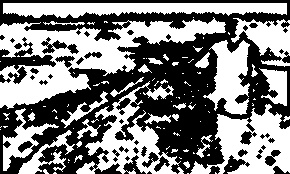

In [16]:
cv2_imshow(cv2.imread("/content/drive/MyDrive/Data_sets/PETR/Spill_Data/_mask_test_/Oilspill/_mask_Oilspill_085.jpg"))